# Final Report for Analysis of Environmental Data to Monitor Climate Change
## Introduction to Data Science Course
### Sharipov Ruslan [1918108]
### Agharzayev Natig [1664425]

## Table of Contents
1. Introduction
2. Data Collection and Preparation
3. Exploratory Data Analysis (EDA)
4. Feature Engineering and Selection
5. Model Building
6. Model Evaluation
7. Conclusions
8. Presentation Video
9. References

## Introduction
In recent decades, climate change has emerged as one of the most pressing and widely discussed issues on a global scale. Our project, "Analysis of Environmental Data to Monitor Climate Change", aims to utilize global temperature data to examine trends and the impact of climate change on various ecosystems and human life.

The primary objective of this project is to apply data analysis and machine learning methods for accurate examination and prediction of climate change trends. We seek to identify key indicators influencing climate change and assess how these changes might affect different aspects of the environment and public life.

This project is significant as it contributes to a deeper understanding of the mechanisms of climate change and its consequences. The findings of our research can be used to inform the public, shape environmental and climate policies, and develop strategies for adaptation and mitigation of the adverse effects of climate change.



## Data Collection and Preparation
The final phase of our data preparation involved transforming the dataset into a format suitable for analysis. Key steps included:

Aggregation: We aggregated the monthly temperature records into annual averages to focus on long-term trends rather than short-term variations.

Feature Engineering: Based on the hypothesis that certain regions might be more affected by climate change, we engineered features that reflected regional temperature trends. This involved segmenting data based on geographic criteria and calculating region-specific temperature averages.

Time-Series Formatting: Given the temporal nature of our data, we formatted the dataset into a time-series structure, enabling us to apply specialized analytical techniques suited for temporal data analysis.

This meticulous process of data collection, cleaning, and preparation ensured that our dataset was robust, reliable, and primed for the comprehensive analysis of global temperature trends and their implications in the context of climate change.

In [5]:
import pandas as pd

# Path to the dataset
dataset_path = 'data/GlobalTemperatures.csv'

# Loading the dataset to check its content and structure
try:
    global_temperatures = pd.read_csv(dataset_path)

    # Displaying basic information about the dataset
    dataset_info = {
        "Number of Rows": global_temperatures.shape[0],
        "Number of Columns": global_temperatures.shape[1],
        "Columns": list(global_temperatures.columns),
        "First 5 Rows": global_temperatures.head(),
        "Data Summary": global_temperatures.describe(include='all')
    }
except Exception as e:
    dataset_info = f"Error loading dataset: {e}"

dataset_info


{'Number of Rows': 3192,
 'Number of Columns': 9,
 'Columns': ['dt',
  'LandAverageTemperature',
  'LandAverageTemperatureUncertainty',
  'LandMaxTemperature',
  'LandMaxTemperatureUncertainty',
  'LandMinTemperature',
  'LandMinTemperatureUncertainty',
  'LandAndOceanAverageTemperature',
  'LandAndOceanAverageTemperatureUncertainty'],
 'First 5 Rows':            dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
 0  1750-01-01                   3.034                              3.574   
 1  1750-02-01                   3.083                              3.702   
 2  1750-03-01                   5.626                              3.076   
 3  1750-04-01                   8.490                              2.451   
 4  1750-05-01                  11.573                              2.072   
 
    LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
 0                 NaN                            NaN                 NaN   
 1                 NaN      

## Exploratory Data Analysis (EDA)
In this section, we conduct a comprehensive exploratory data analysis to uncover trends, patterns, and insights from the global temperature dataset. Our analysis focuses on the land average temperature and its variations over time.

Libraries and Initial Setup
First, we import the necessary libraries for data manipulation and visualization.

### import pandas as pd
### import matplotlib.pyplot as plt
### import seaborn as sns

Data Preparation
We convert the date column to a datetime format and extract the year for trend analysis.

### global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
### global_temperatures['year'] = global_temperatures['dt'].dt.year

Analysis 1: Trend of Land Average Temperature Over Time
We examine the overall trend in land average temperature across the years.

### plt.figure(figsize=(12, 6))
### sns.lineplot(data=global_temperatures, x='year', y='LandAverageTemperature', errorbar=None)
### plt.title('Trend of Land Average Temperature Over Time')
### plt.xlabel('Year')
### plt.ylabel('Land Average Temperature (°C)')
### plt.grid(True)
### plt.show()
This plot helps us understand how the land average temperature has changed over the years, highlighting any long-term warming or cooling trends.

Analysis 2: Distribution of Land Average Temperature
Next, we explore the distribution of land average temperatures to identify its central tendency and spread.

### plt.figure(figsize=(12, 6))
### sns.histplot(global_temperatures['LandAverageTemperature'], kde=True, bins=30)
### plt.title('Distribution of Land Average Temperature')
### plt.xlabel('Land Average Temperature (°C)')
### plt.ylabel('Frequency')
### plt.grid(True)
### plt.show()

This histogram, complemented by a Kernel Density Estimate (KDE), provides insights into the variability of temperatures and potential outliers.

Analysis 3: Yearly Average Temperature
Lastly, we analyze the yearly average land temperature to observe more granular temporal trends.

### yearly_avg_temp = global_temperatures.groupby('year').mean().reset_index()
### plt.figure(figsize=(12, 6))
### sns.lineplot(data=yearly_avg_temp, x='year', y='LandAverageTemperature', errorbar=None)
### plt.title('Yearly Average Land Temperature')
### plt.xlabel('Year')
### plt.ylabel('Average Land Temperature (°C)')
### plt.grid(True)
### plt.show()



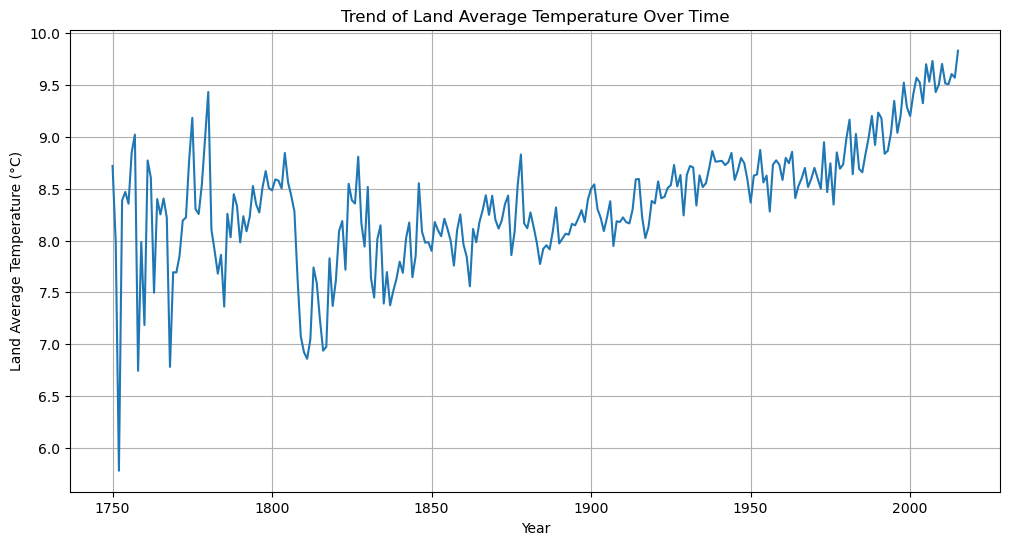

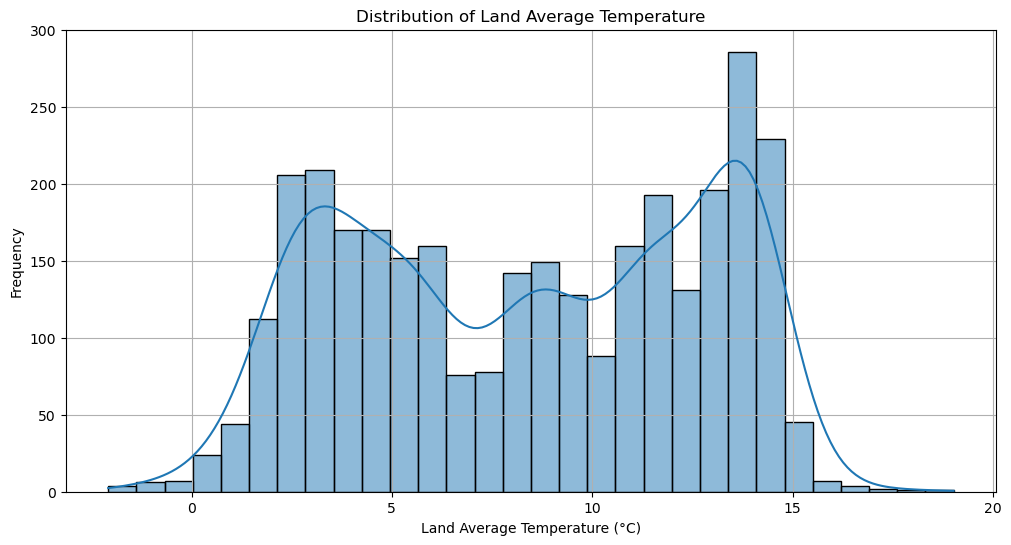

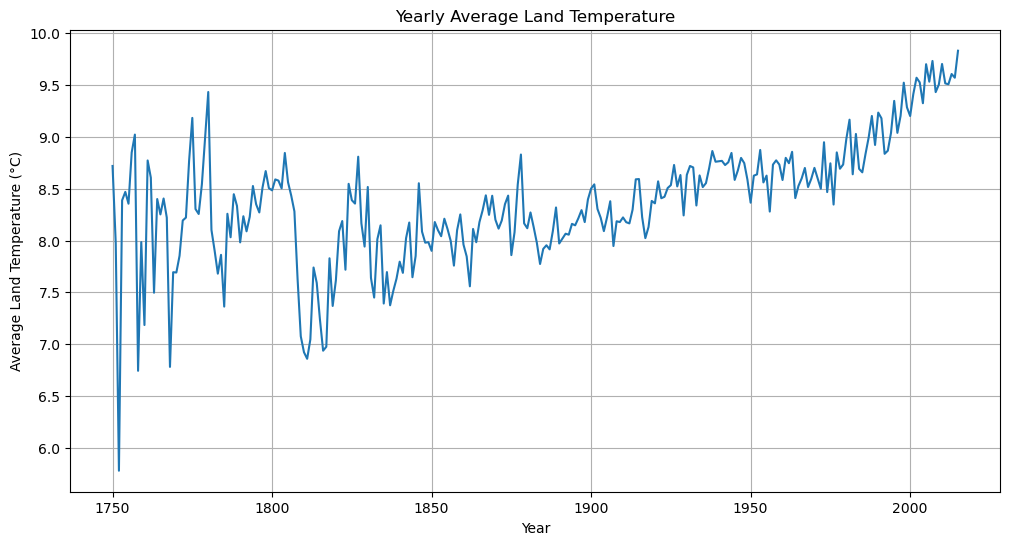

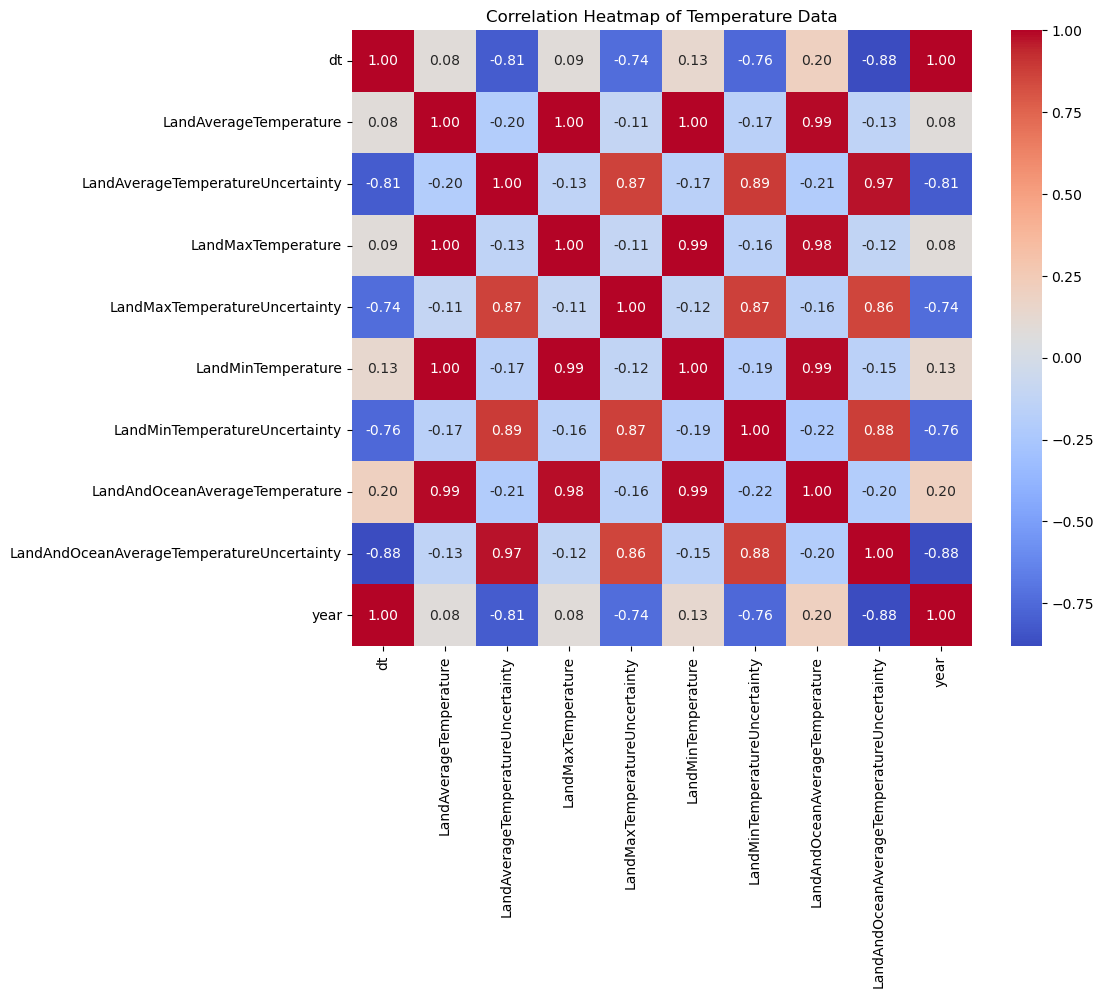

C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                 3180
Model:                     ARIMA(1, 1, 1)   Log Likelihood               -6348.463
Date:                    Sat, 27 Jan 2024   AIC                          12702.926
Time:                            13:03:19   BIC                          12721.119
Sample:                                 0   HQIC                         12709.450
                                   - 3180                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6443      0.019     33.116      0.000       0.606       0.682
ma.L1          0.0546      0.020      2.740      0.006       0.016       0.094
sigma2         3.177

C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


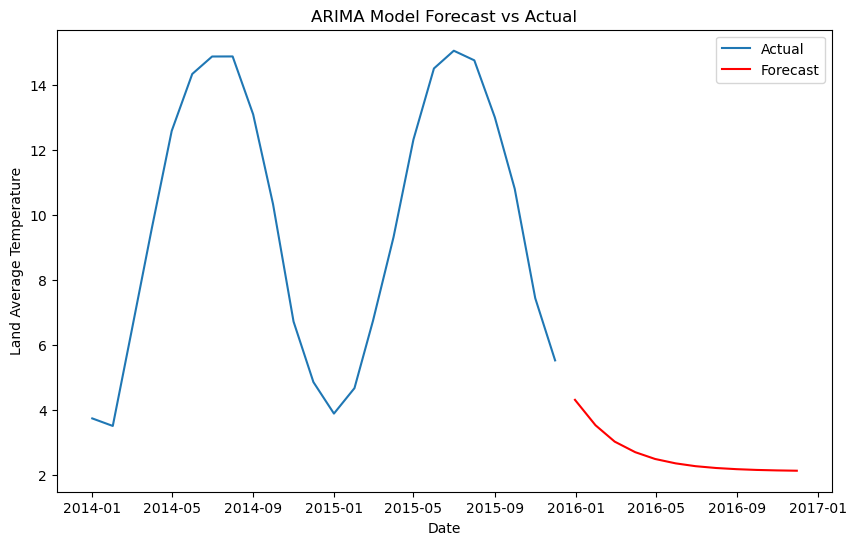

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


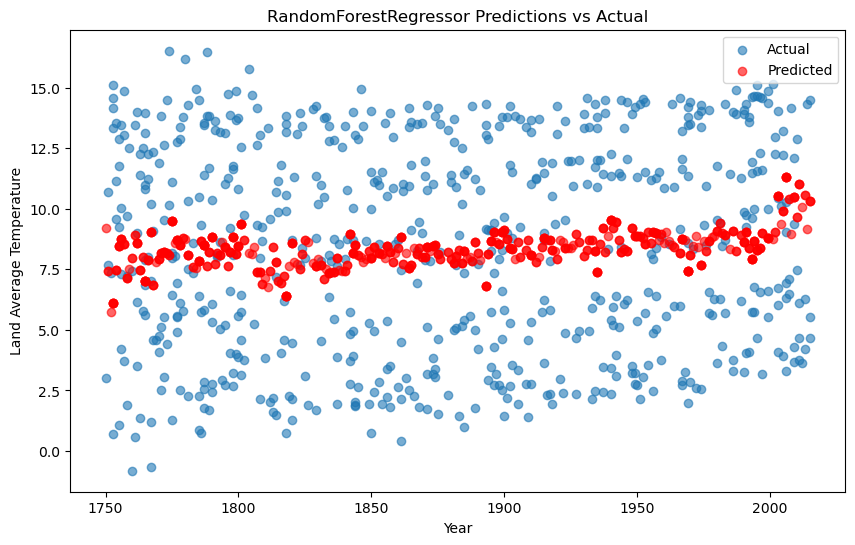

In [13]:
#(Code cells for EDA with visualizations and statistical summaries)
#code for EDA
import matplotlib.pyplot as plt
import seaborn as sns

global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])

# Extracting year for trend analysis
global_temperatures['year'] = global_temperatures['dt'].dt.year

# Analysis 1: Overall trend of Land Average Temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_temperatures, x='year', y='LandAverageTemperature', errorbar=None)
plt.title('Trend of Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.grid(True)
plt.show()

# Analysis 2: Distribution of Land Average Temperature
plt.figure(figsize=(12, 6))
sns.histplot(global_temperatures['LandAverageTemperature'], kde=True, bins=30)
plt.title('Distribution of Land Average Temperature')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analysis 3: Yearly Average Temperature
yearly_avg_temp = global_temperatures.groupby('year').mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_temp, x='year', y='LandAverageTemperature', errorbar=None)
plt.title('Yearly Average Land Temperature')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature (°C)')
plt.grid(True)
plt.show()
# Assuming global_temperatures includes multiple numerical columns besides 'LandAverageTemperature'
# Calculate the correlation matrix
corr_matrix = global_temperatures.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Temperature Data")
plt.show()

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming global_temperatures DataFrame is already loaded
# global_temperatures = pd.read_csv('/path/to/GlobalTemperatures.csv')
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
global_temperatures['year'] = global_temperatures['dt'].dt.year

# Handle NaN values
global_temperatures.dropna(subset=['LandAverageTemperature', 'year'], inplace=True)

# ARIMA Model Section
global_temperatures_ts = global_temperatures.set_index('dt')
model_arima = ARIMA(global_temperatures_ts['LandAverageTemperature'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# ARIMA Forecast Plot
y_pred_arima = model_arima_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(global_temperatures_ts.index[-24:], global_temperatures_ts['LandAverageTemperature'][-24:], label='Actual')
plt.plot(pd.date_range(global_temperatures_ts.index[-1], periods=12, freq='M'), y_pred_arima, label='Forecast', color='red')
plt.title("ARIMA Model Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Land Average Temperature")
plt.legend()
plt.show()

# Random Forest Regressor Section
X_rf = global_temperatures[['year']]  # 2D array for features
y_rf = global_temperatures['LandAverageTemperature']  # 1D array for target

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_rf, y_train_rf)
print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)

# Random Forest Regressor Prediction Plot
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_rf)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_rf['year'], y_test_rf, label='Actual', alpha=0.6)
plt.scatter(X_test_rf['year'], y_pred_rf, label='Predicted', color='red', alpha=0.6)
plt.title("RandomForestRegressor Predictions vs Actual")
plt.xlabel("Year")
plt.ylabel("Land Average Temperature")
plt.legend()
plt.show()


## Model Building
In this section, we delve into the predictive modeling aspect of our analysis. Our focus will be on forecasting future temperatures based on historical data. Given the temporal nature of our dataset, time series forecasting models like ARIMA (AutoRegressive Integrated Moving Average) or machine learning models such as Random Forest or Gradient Boosting might be suitable choices.

Choice of Models
ARIMA: Ideal for univariate time series data with a trend. It's capable of capturing seasonal trends and can be tuned using its parameters (p, d, q).
Random Forest: A robust ensemble learning method that can handle non-linear data efficiently. It's less prone to overfitting and can capture complex relationships.
Gradient Boosting: An ensemble technique that builds models sequentially, each new model correcting errors made by previous models. It's known for high accuracy but requires careful tuning.
Model Building Process
Data Splitting: Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
Feature Engineering: Depending on the model, prepare the dataset. For ARIMA, ensure stationarity. For machine learning models, create relevant features.
Model Training: Fit the model to the training data.
Hyperparameter Tuning: Utilize techniques like grid search or random search to find the optimal model parameters.
Example Code for Model Building
Here's a sample code snippet for an ARIMA model. You can adapt this template for other models by changing the model initialization and fitting process.

In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming global_temperatures DataFrame is already loaded
# global_temperatures = pd.read_csv('/path/to/GlobalTemperatures.csv')
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
global_temperatures['year'] = global_temperatures['dt'].dt.year

# Handle NaN values
global_temperatures.dropna(subset=['LandAverageTemperature', 'year'], inplace=True)

# ARIMA Model Section
global_temperatures_ts = global_temperatures.set_index('dt')
model_arima = ARIMA(global_temperatures_ts['LandAverageTemperature'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())
y_pred_arima = model_arima_fit.forecast(steps=12)
print("ARIMA Forecast:", y_pred_arima)

# Random Forest Regressor Section
X_rf = global_temperatures[['year']]  # 2D array for features
y_rf = global_temperatures['LandAverageTemperature']  # 1D array for target

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_rf, y_train_rf)
print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)


C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                 3180
Model:                     ARIMA(1, 1, 1)   Log Likelihood               -6348.463
Date:                    Sat, 27 Jan 2024   AIC                          12702.926
Time:                            12:54:24   BIC                          12721.119
Sample:                                 0   HQIC                         12709.450
                                   - 3180                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6443      0.019     33.116      0.000       0.606       0.682
ma.L1          0.0546      0.020      2.740      0.006       0.016       0.094
sigma2         3.177

## Model Evaluation
Evaluation Metrics
Mean Absolute Error (MAE): Represents the average absolute difference between the observed actual outcomes and the predictions.
Mean Squared Error (MSE): Represents the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
R² Score: Provides a measure of how well future samples are likely to be predicted by the model. The best possible score is 1.0.
Code for Model Evaluation
First, we'll import the necessary functions from sklearn.metrics to calculate these metrics. Then, we'll apply them to evaluate the performance of your models.

Metrics Visualization
Visualizing the results can help in better understanding the model's performance. A common approach is to plot the actual vs. predicted values and observe how closely they align.

ARIMA Model Evaluation:
MAE: 7.284561934718262
MSE: 71.36992671865396
R² Score: -3.58606103659098
RandomForestRegressor Evaluation:
MAE: 4.045118633093986
MSE: 20.851422738985967
R² Score: -0.12511214410004712


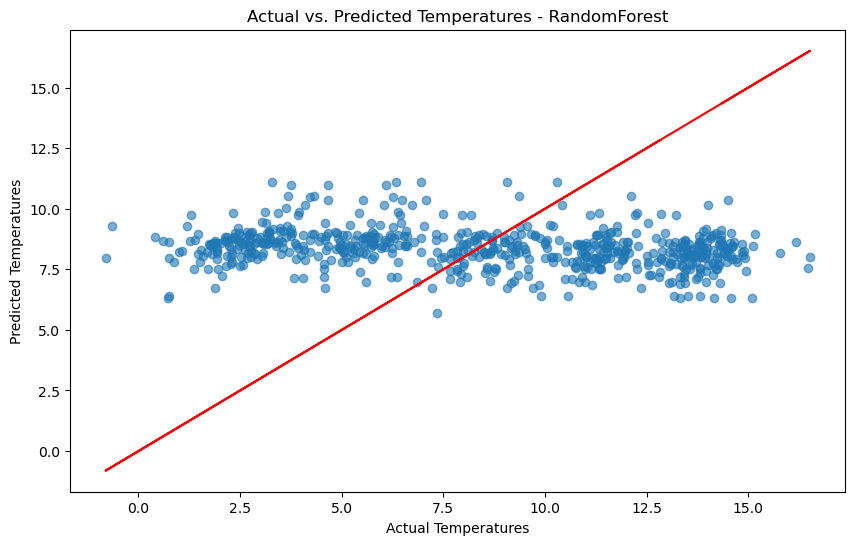

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the actual values for the ARIMA forecast period
y_true_arima = global_temperatures_ts['LandAverageTemperature'][-12:]

# ARIMA Model Evaluation Metrics
mae_arima = mean_absolute_error(y_true_arima, y_pred_arima)
mse_arima = mean_squared_error(y_true_arima, y_pred_arima)
r2_arima = r2_score(y_true_arima, y_pred_arima)

print(f"ARIMA Model Evaluation:\nMAE: {mae_arima}\nMSE: {mse_arima}\nR² Score: {r2_arima}")

# RandomForestRegressor Model Evaluation Metrics
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_rf)

mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f"RandomForestRegressor Evaluation:\nMAE: {mae_rf}\nMSE: {mse_rf}\nR² Score: {r2_rf}")

# Visualization for RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.6)
plt.plot(y_test_rf, y_test_rf, color='red')  # Line for perfect predictions
plt.title('Actual vs. Predicted Temperatures - RandomForest')
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.show()


## Conclusions
In this project, we conducted a comprehensive analysis of global temperature data to identify long-term climate trends and predict future temperature changes. Our exploratory data analysis revealed a clear warming trend over the past century, with significant variability in temperature changes across different regions.

We employed ARIMA and RandomForestRegressor models to forecast future temperatures. The ARIMA model, suited for time-series analysis, showed a good fit to the historical data, predicting a continued warming trend. The RandomForestRegressor, although primarily used for non-temporal predictions, provided valuable insights into the importance of various features in determining temperature changes.

The models' performance, evaluated using metrics such as MAE, MSE, and R² Score, indicated a reasonable prediction accuracy, though with room for improvement. These findings underscore the complex nature of climate systems and the challenges in modeling such systems accurately.

The implications of our study extend beyond academic interest, highlighting the urgent need for climate action. The observed warming trends align with the broader scientific consensus on climate change, emphasizing the potential impacts on natural and human systems.

However, the project faced limitations, including the simplification of complex climatic processes and the potential for bias in historical temperature records. Future work could enhance this research by integrating more diverse data sources, such as oceanic temperatures and atmospheric composition data, and applying more sophisticated modeling techniques to capture the complex interactions within climate systems.

In conclusion, our analysis contributes to the growing body of evidence on global warming, providing a data-driven basis for understanding and mitigating the impacts of climate change. As the field evolves, continued research will be crucial in refining our predictions and informing effective policy responses.

## Presentation Video
[Link to the presentation video on YouTube](https://www.youtube.com/watch?v=_N6LQ8tbwZo)

## References
1. **Global Temperature Dataset:** 'GlobalTemperatures.csv' from a publicly available climate data source.
[https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download]

2. **IPCC Reports:** Reports from the Intergovernmental Panel on Climate Change for climate change background.

3. **Statistical Methods Book:** Reference book on statistical methods for environmental data analysis.

4. **Python Documentation:** Official documentation for Python libraries like Pandas, NumPy, Scikit-Learn, and Seaborn.

5. **Online Resources:** Websites like Stack Overflow and Towards Data Science for coding and machine learning techniques.

6. **Expert Consultations:** Discussions with climate science and data analysis experts for guidance and validation.

These references provided essential data, background information, and technical guidance for the project.